In [5]:
import pandas as pd
import numpy as np

<h3>sales_history.csv - история продаж</h3>

'salerevenuerub' - продажи в руб.,

'soldpieces' - в шт.,

'skutertiaryid' - уникальный идентификатор товара,

'posid' - уникальный идентификатор магазина,

'sale_dt' - дата продажи (данные понедельные),


<h3>promo_history.xlsx - история промо-акций</h3>

'start_dttm' - дата начала акции,

'end_dttm' - дата окончания акции,

'skutertiaryid' - уникальный идентификатор товара,

'promotypeid' - тип промо-акции,

'chaindiscountvalue' - размер скидки.


In [7]:
sales = pd.read_csv('sales_history.csv')

In [8]:
promo = pd.read_excel('promo_history.xlsx')

In [9]:
promo.drop(columns=['Unnamed: 0', 0], inplace=True)
sales.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
sales['price'] = sales['salerevenuerub']/sales['soldpieces']

In [11]:
import datetime
sales['sale_dt'] = sales['sale_dt'].apply(lambda x: datetime.datetime.fromisoformat(x))

In [12]:
sales[sales['sale_dt'] == datetime.datetime.fromisoformat('2018-06-18')]

,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt,price
460539,848.552160,11,7182,293136,2018-06-18,77.141105
460545,318.812400,4,7182,296833,2018-06-18,79.703100
460551,772.197900,33,7189,293136,2018-06-18,23.399936
460554,46.798800,2,7189,296833,2018-06-18,23.399400
460556,596.572600,25,7193,293136,2018-06-18,23.862904
...,...,...,...,...,...,...
864476,43.456413,7,7247,318763,2018-06-18,6.208059
864480,128.033998,22,7247,295964,2018-06-18,5.819727
864483,153.675821,22,7247,295975,2018-06-18,6.985265
864486,12.416118,2,7247,298891,2018-06-18,6.208059


In [13]:
len(sales['skutertiaryid'].unique())

10

In [10]:
for index, i in promo.iterrows():
    l = len(sales[(sales['sale_dt'] < i['end_dttm']) & (i['start_dttm'] < sales['sale_dt'])])
    print(f"For {index} promo ({i['start_dttm']}-{i['end_dttm']}) has {l} sales.")

For 0 promo (2019-01-16 00:00:00-2019-01-29 00:00:00) has 162540 sales.
For 1 promo (2019-01-16 00:00:00-2019-01-29 00:00:00) has 162540 sales.
For 2 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 3 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 4 promo (2019-02-13 00:00:00-2019-02-26 00:00:00) has 190430 sales.
For 5 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 6 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 7 promo (2019-03-13 00:00:00-2019-03-26 00:00:00) has 200060 sales.
For 8 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 9 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 10 promo (2019-04-10 00:00:00-2019-04-23 00:00:00) has 215547 sales.
For 11 promo (2019-04-24 00:00:00-2019-05-07 00:00:00) has 302526 sales.
For 12 promo (2019-05-07 00:00:00-2019-05-07 00:00:00) has 0 sales.
For 13 promo (2019-05-08 00:00:00-2019-05-14 00:00:00) has 108208 

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
def get_sales_for_year_and_month(df, year=2018, month_start='01', month_end=12):
    return df[(df['sale_dt'] >= datetime.datetime.fromisoformat(f'{year}-{month_start}-01')) & (df['sale_dt'] <= datetime.datetime.fromisoformat(f'{year}-{month_end}-30'))]

In [16]:
def get_promo_for_year_and_month(df, year=2019, month='01'):
    return df[(df['start_dttm'] >= datetime.datetime.fromisoformat(f'{year}-{month}-01')) & (df['end_dttm'] <= datetime.datetime.fromisoformat(f'{year}-{month}-28'))]

In [15]:
month_promos = {}
for m in range(1, 13):
    c = 0
    for y in [2018, 2019, 2020, 2021]:
        c += len(get_promo_for_year_and_month(promo, year=y, month=f'{m}'.zfill(2)))
    month_promos[m] = c

<h3>Получаем месяцы продаж и рисуем график, чтобы лучше узнать данные и попробовать увидеть сезонность</h3>

In [16]:
month_sales_2018 = get_sales_for_year_and_month(sales, year=2018)['sale_dt'].apply(lambda x: x.month) 
month_sales_2019 = get_sales_for_year_and_month(sales, year=2019)['sale_dt'].apply(lambda x: x.month) 
month_sales_2020 = get_sales_for_year_and_month(sales, year=2020)['sale_dt'].apply(lambda x: x.month) 
month_sales_2021 = get_sales_for_year_and_month(sales, year=2021)['sale_dt'].apply(lambda x: x.month) 

month = ['Янв', "Фев", "Март", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"]

month_sales_count_2018 = dict(Counter(month_sales_2018))
month_sales_count_2018 = [month_sales_count_2018.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2019 = dict(Counter(month_sales_2019))
month_sales_count_2019 = [month_sales_count_2019.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2020 = dict(Counter(month_sales_2020))
month_sales_count_2020 = [month_sales_count_2020.setdefault(i, 0) for i in range(1, 13)]

month_sales_count_2021 = dict(Counter(month_sales_2021))
month_sales_count_2021 = [month_sales_count_2021.setdefault(i, 0) for i in range(1, 13)]


In [17]:
import numpy as np

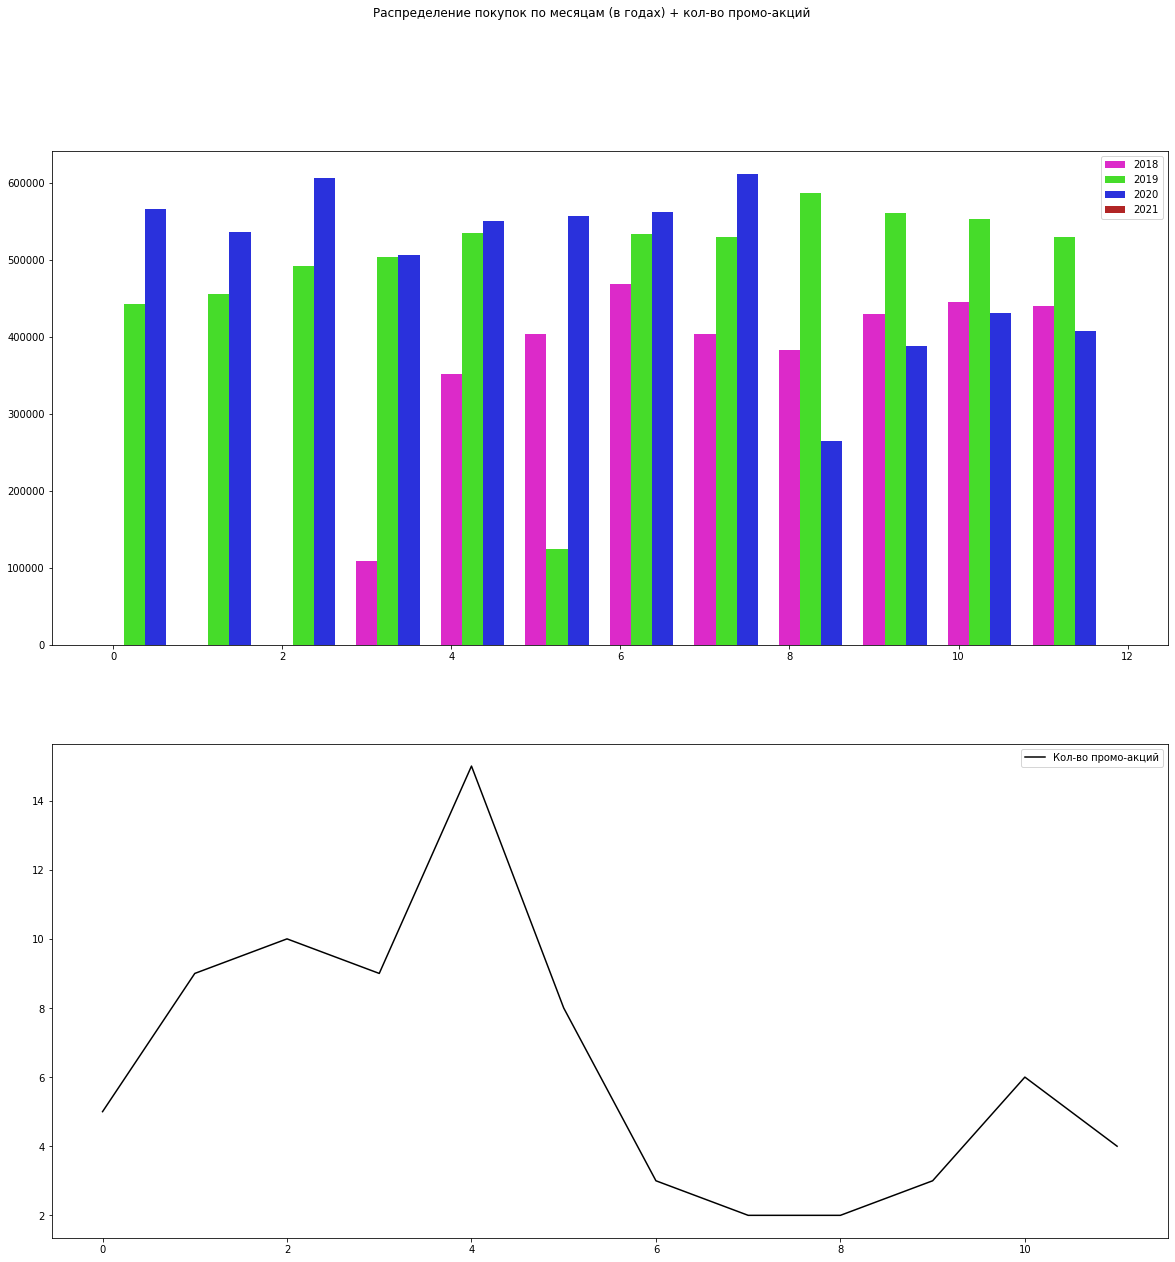

In [18]:

fig, axs = plt.subplots(2, figsize=(20,20))
fig.suptitle('Распределение покупок по месяцам (в годах) + кол-во промо-акций')

X = np.arange(12)
axs[0].bar(X+0.0, month_sales_count_2018, color='#DC2AC9', width = 0.25)
axs[0].bar(X+0.25, month_sales_count_2019, color='#46DC2A', width = 0.25)
axs[0].bar(X+0.5, month_sales_count_2020, color='#2A31DC', width = 0.25)
axs[0].bar(X+0.75, month_sales_count_2021, color='#B12525', width = 0.25)

axs[1].plot(X, month_promos.values(), color='black')

axs[0].legend(labels=['2018', '2019', '2020', '2021'])

axs[1].legend(labels=["Кол-во промо-акций"])

plt.show()

In [68]:
def check_sale_in_promo_period(sale_date):
    if isinstance(sale_date, str):
        sale_date = datetime.datetime.fromisoformat(sale_date)
    promo_in_period = promo[(promo['start_dttm'] <= sale_date) & (promo['end_dttm'] >= sale_date)]
    return not promo_in_period.empty, promo_in_period

In [17]:
from catboost import CatBoostRegressor
cat_features = [2]
model = CatBoostRegressor(iterations=3000)
model.load_model('model', format='cbm')

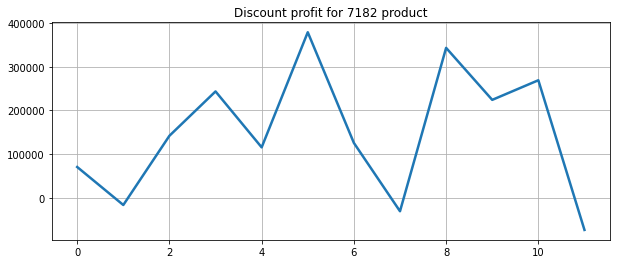

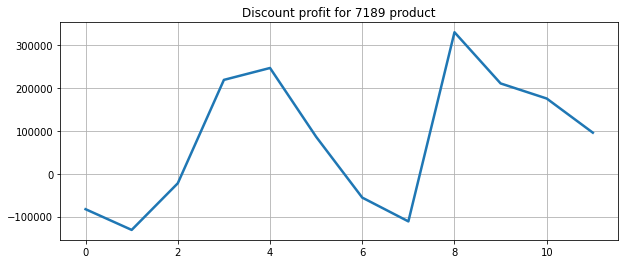

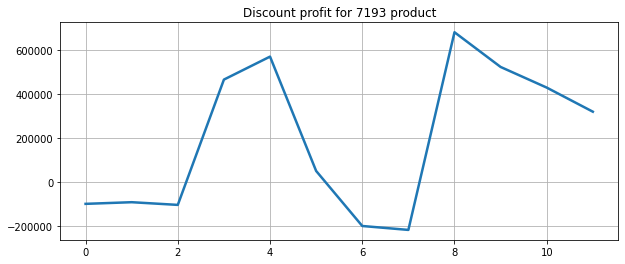

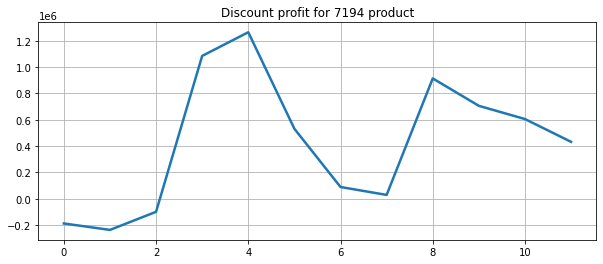

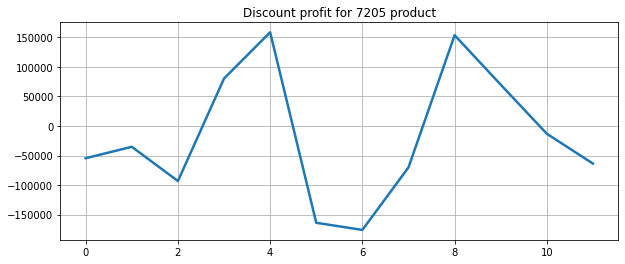

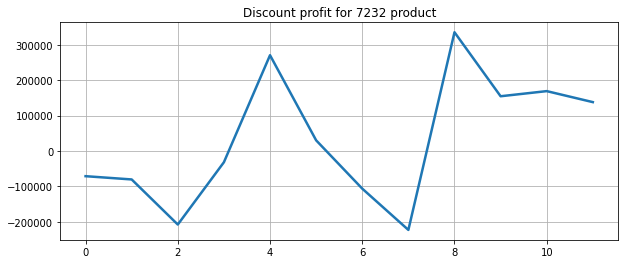

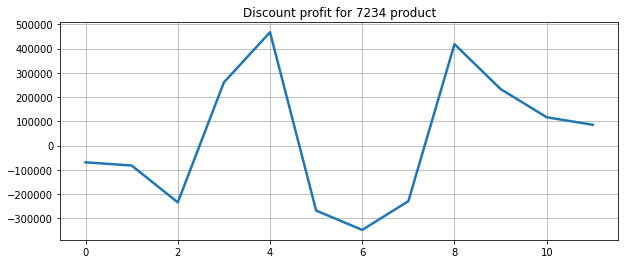

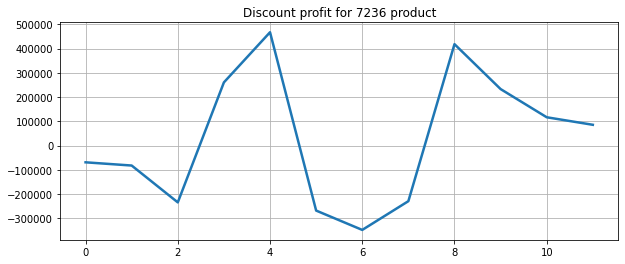

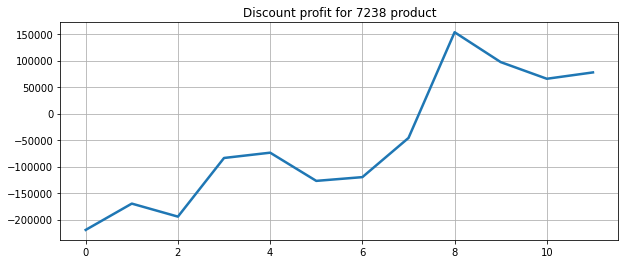

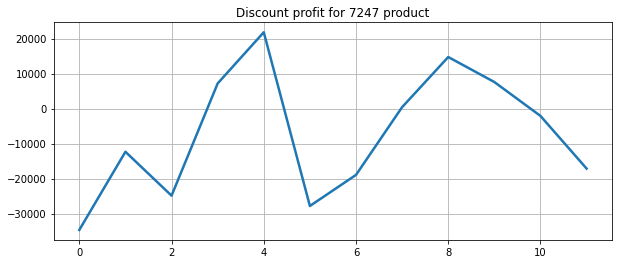

In [19]:
products = np.unique(sales['skutertiaryid'].values)
for product in products:
  preds = []
  for month in range(1,13):
    preds.append(model.predict([month, 1, product]))
  plt.figure(figsize=(10,4))
  plt.title(f'Discount profit for {product} product')
  plt.grid()
  plt.plot(preds, linewidth =2.5)

In [21]:
month, day, product = 5, 1, '7182'
f'Предполагаемая прибыль от проведения акции: {model.predict([month, day, product])}'

'Предполагаемая прибыль от проведения акции: 115700.34761597106'

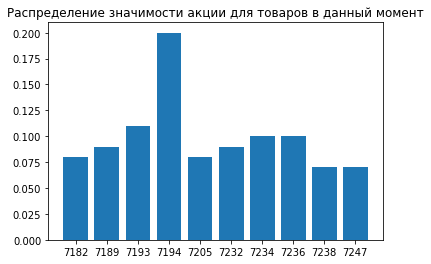

In [23]:
from scipy.special import softmax
probas = np.array([model.predict([month, day, product]) for product in products])
probas = [round(x,2) for x in softmax(probas/probas.max())]
plt.title('Распределение значимости акции для товаров в данный момент')
plt.bar(range(10), height=probas)
plt.xticks(range(10), products)
None